The main aim of this model is  to predict if a patient has chronic kidney disease or not using several classification algorithms of supervised learning. The Kidney Disease dataset contains 26 features which may predict if a patient has chronic kidney disease or not

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [185]:
data =  pd.read_csv('kidney_disease.csv')

In [147]:
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [186]:
#Renaming columns 
data.rename(columns=
            {'bp': 'blood_pressure',
             'sg': 'specific gravity',
             'al':'albumin',
             'su':'sugar',
             'rbc':'red blood cells',
             'pc':'pus cell',
             'pcc':'pus cell clumps',
             'ba':'bacteria',
             'bgr':'blood glucose random',
             'bu':'blood urea',
             'sc':'serum creatinine',
             'sod':'sodium',
             'pot':'potassium',
             'hemo':'hemoglobin',
             'pcv':'packed cell volume',
             'wc':'white blood cell count',
             'rc':'red blood cell count',
             'htn':'hypertension',
             'dm':'diabetes mellitus',
             'cad':'coronary artery disease',
             'appet':'appetite',
             'pe':'pedal edema',
             'ane':'anemia',
             'classification':'class'},inplace=True)


In [149]:
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [150]:
data.shape

(400, 26)

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7   pus cell                 335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [152]:
data.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          70
white blood cell count     105
red blood cell count       130
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [153]:
data.describe()

,id,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [187]:
#Filling null values  with the mean  for the numerical column
data = data.fillna(data.mean())

In [188]:
#Filling the categorical column with the most frequent class
data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [156]:
data.isnull().sum()

id                         0
age                        0
blood_pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      400 non-null    float64
 2   blood_pressure           400 non-null    float64
 3   specific gravity         400 non-null    float64
 4   albumin                  400 non-null    float64
 5   sugar                    400 non-null    float64
 6   red blood cells          400 non-null    object 
 7   pus cell                 400 non-null    object 
 8   pus cell clumps          400 non-null    object 
 9   bacteria                 400 non-null    object 
 10  blood glucose random     400 non-null    float64
 11  blood urea               400 non-null    float64
 12  serum creatinine         400 non-null    float64
 13  sodium                   400 non-null    float64
 14  potassium                4

In [189]:
data.drop('id', axis=1, inplace = True)

In [190]:
# converting  packed cell volume, white blood cell count, red blood cell count and age columns to their appropriate data df['packed cell volume'] = pd.to_numeric(df['packed cell volume'], errors='coerce')

data['packed cell volume'] = pd.to_numeric(data['packed cell volume'], errors='coerce')
data['white blood cell count'] = pd.to_numeric(data['white blood cell count'], errors='coerce')
data['red blood cell count'] = pd.to_numeric(data['red blood cell count'], errors='coerce')

data['age'] = data['age'].astype('int')


In [160]:
data.isnull().sum()

age                        0
blood_pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         1
white blood cell count     1
red blood cell count       1
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [191]:
data  = data.dropna()

In [192]:
#Seperating the numerical variable and categerical variable to properly explore the distribution of the variables

numerical_features = data.select_dtypes(exclude='object')
categorical_features = data.select_dtypes(include='object')

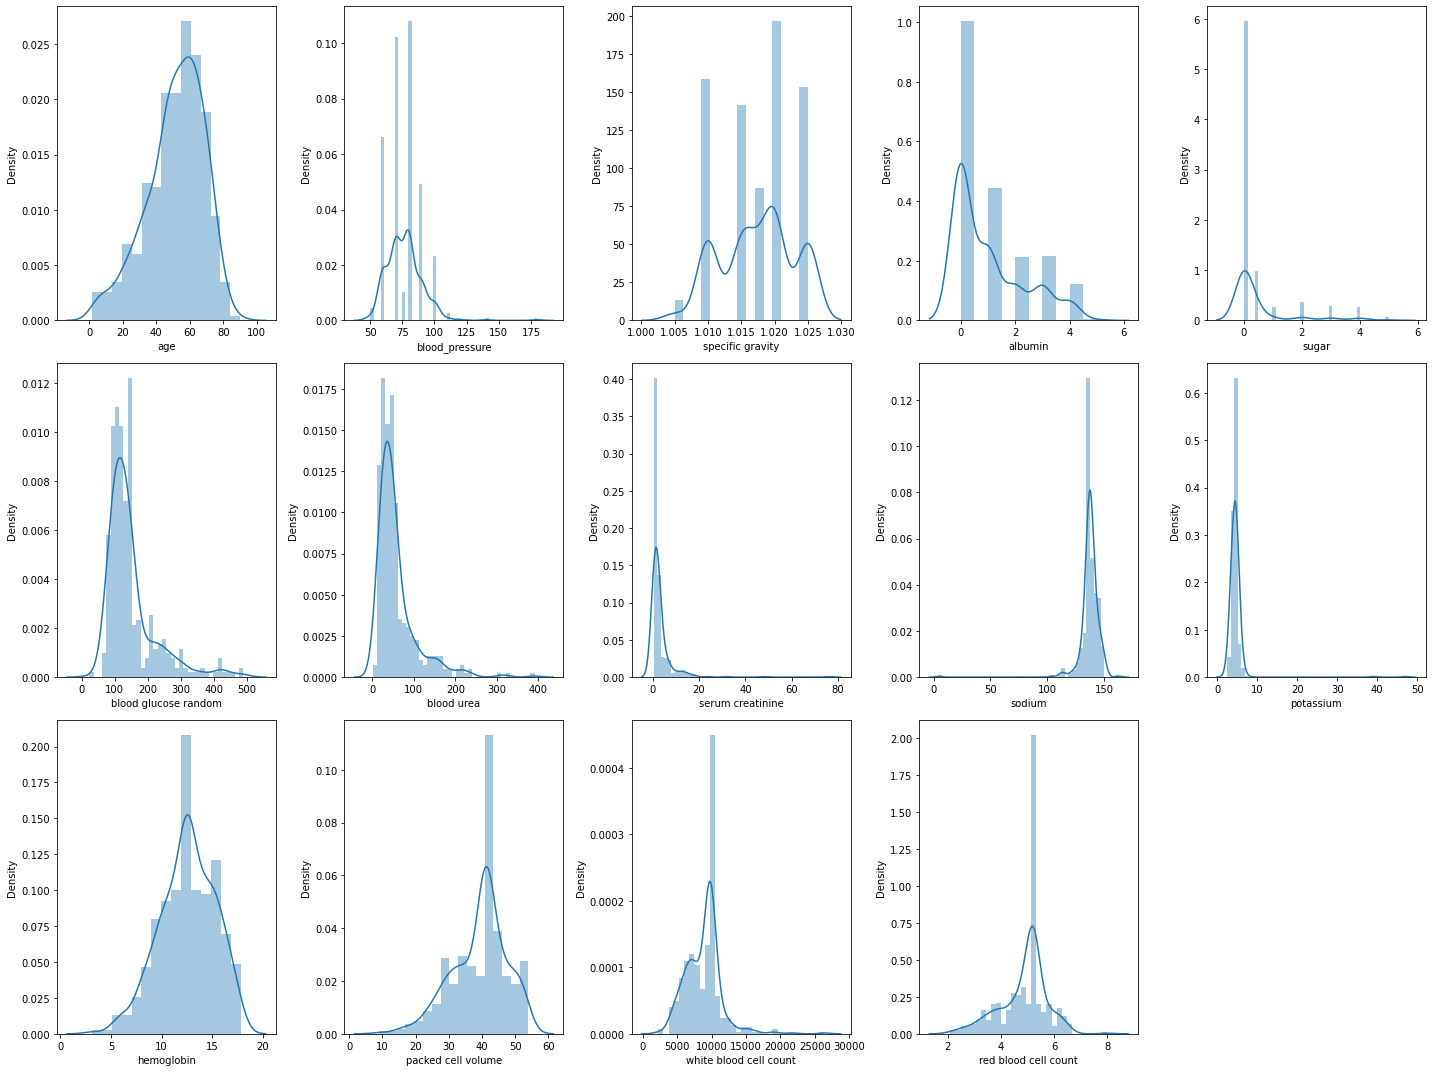

In [163]:

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numerical_features:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

From the represention above, the data near the mean are more frequent in occurence than data far from the mean 

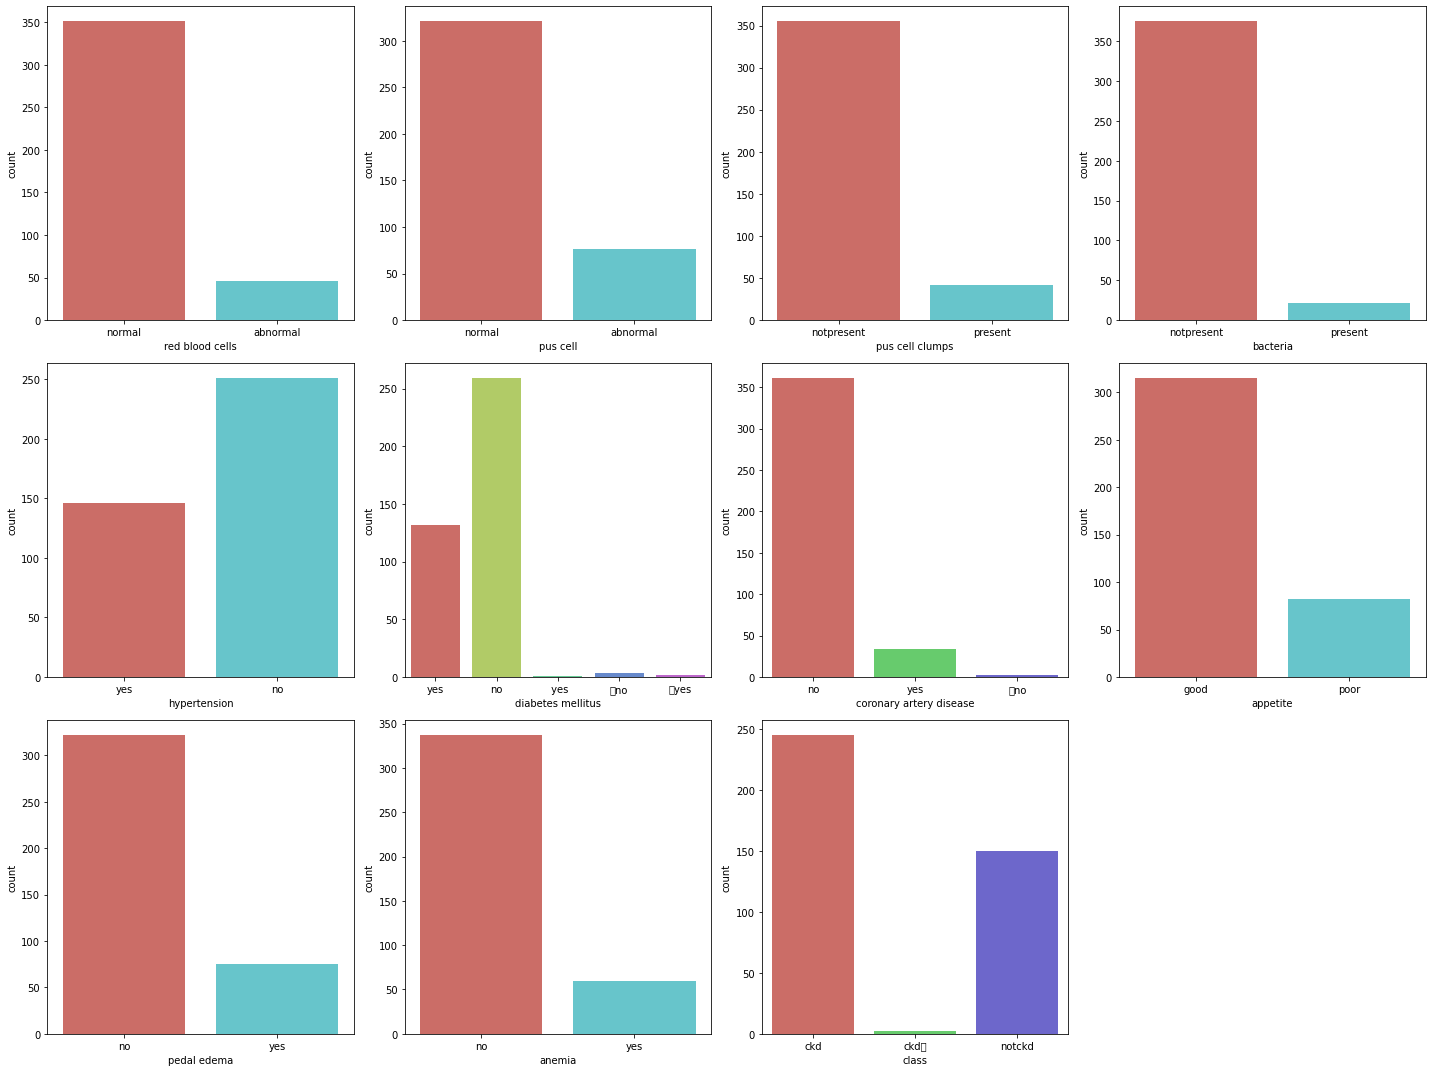

In [164]:

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in categorical_features:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data[column], palette = 'hls')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

       From the various plots on the categorical variable,
    - There are more patient with normal pus cells and red blood cell count
    - There are less patient with bacterial infections and coronary artery disease
    - There are less diabetic and hypertensive patients in the dataset
    - There are more patients with chronic kidney disease compared to those that do not 

In [193]:
#Data Transformation

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_features:
    data[col] = le.fit_transform(data[col])
    
    
data.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.2,1,4,1,0,0,0,0
1,7,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,5.2,0,3,1,0,0,0,0
2,62,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,5.2,0,4,1,1,0,1,0
3,48,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.9,1,3,1,1,1,1,0
4,51,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.6,0,3,1,0,0,0,0


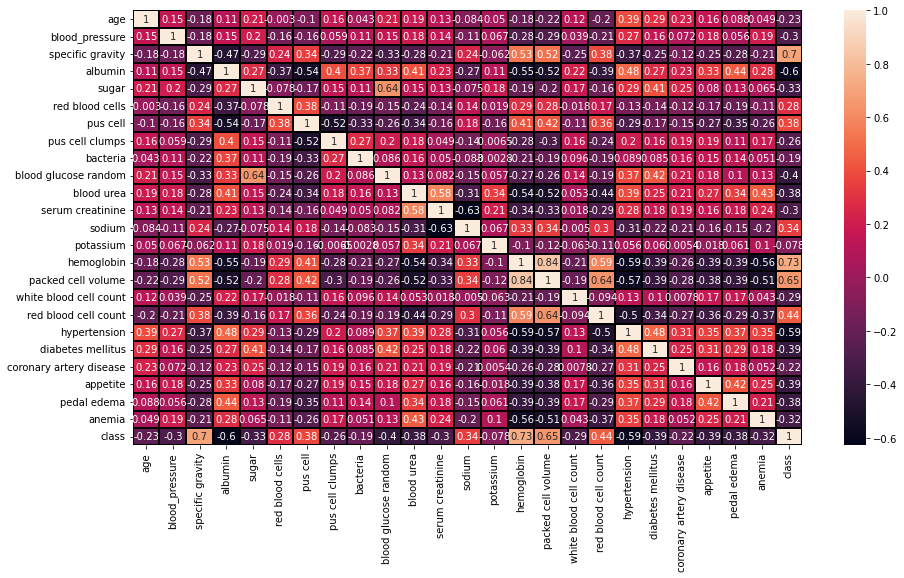

In [166]:
#Checking for correlation between the features and label

plt.figure(figsize = (15, 8))

sns.heatmap(data.corr(), annot = True, linewidths = 2, linecolor = 'black')
plt.show()

In [194]:
#Feature and label Extraction

x = data[['specific gravity', 'albumin', 'hemoglobin', 'packed cell volume','red blood cell count', 'hypertension']]

y = data['class'].values



### Logistics Regression

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Data Spliting 
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.3, random_state=30)


model = LogisticRegression()


model.fit(X_train, y_train)

LogisticRegression()

In [169]:
model.predict(X_test)

array([0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0])

In [170]:
print(f'Train Accuracy = {model.score(X_train, y_train)}')

Train Accuracy = 0.9566787003610109


In [171]:
print(f'Test Accuracy = {model.score(X_test, y_test)}')

Test Accuracy = 0.975


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

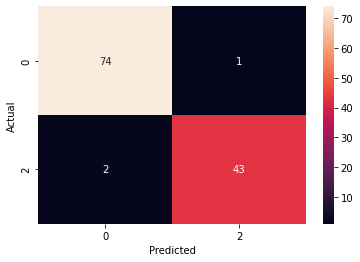

In [172]:
# confusion matrix
import seaborn as sb
y_pred = model.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames= ['Actual'], colnames = ['Predicted'])
sb.heatmap(confusion_matrix, annot=True)

In [173]:
from sklearn.metrics import classification_report 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           2       0.98      0.96      0.97        45

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



Based on the classifcation report
- 97% of patient chronic kidney disease predictied by the model was correct
- 98% of patient without chronic kidney disease predicted by the model was correct
- Out of the total chronic kidney disease patient in the dataset given, 99% of them was predicted correctly by the model
- Out of the total patient without chronic kidney disease in the data given, 97% of them was predicted correctly by the model 

### KNN Classifier

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


k_value = []
for k in range(1,20):
  model = KNeighborsClassifier(k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f'{k} : {accuracy_score(y_pred, y_test)}')
  k_value.append(accuracy_score(y_pred,y_test))

1 : 0.9666666666666667
2 : 0.95
3 : 0.9666666666666667
4 : 0.9666666666666667
5 : 0.9583333333333334
6 : 0.9583333333333334
7 : 0.9416666666666667
8 : 0.9416666666666667
9 : 0.9416666666666667
10 : 0.9416666666666667
11 : 0.9416666666666667
12 : 0.95
13 : 0.95
14 : 0.95
15 : 0.95
16 : 0.95
17 : 0.95
18 : 0.95
19 : 0.95


Text(0.5, 1.0, 'Testing Accuracy for different value of K')

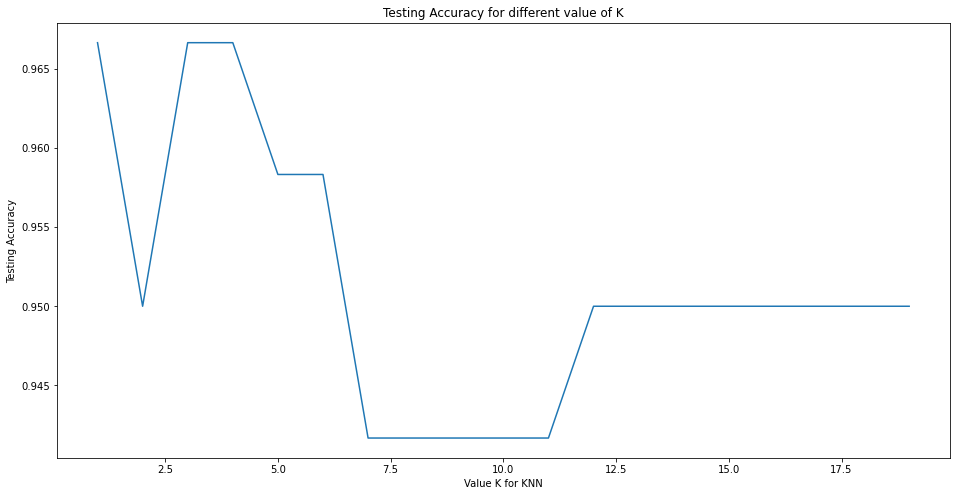

In [175]:
plt.figure(figsize = (16,8))
plt.plot(range(1,20),k_value)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy for different value of K')

In [176]:
#The optimal number of neighbor is 1 because it gives the most appropriate accuracy for the KNN model(0.96)

### Decision tree

In [177]:
#Importing dependencies
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

model = DecisionTreeClassifier(max_depth=3,random_state=20,min_samples_leaf=10)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=20)

In [178]:
#checking accuracy
prediction = model.predict(X_test)

print(f'The_ Accuracy Score of the test data : {accuracy_score(prediction,y_test)}')
print(f'The_ Accuracy Score of the training data : {accuracy_score(model.predict(X_train),y_train)}')

The_ Accuracy Score of the test data : 0.9583333333333334
The_ Accuracy Score of the training data : 0.9675090252707581


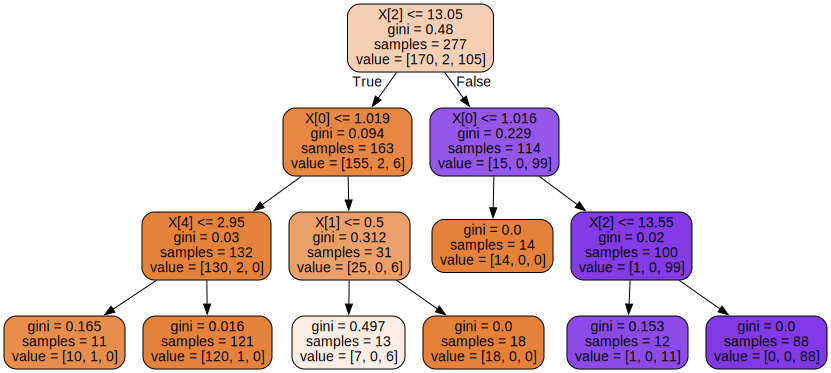

In [179]:
#Decision Tree Visualization using Graphviz

import graphviz
graph_ = tree.export_graphviz(model,label='all',rounded=True,filled=True)
graph = graphviz.Source(graph_)

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

graph.render("data")
graph



### Random Forest

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 


rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(X_train,y_train)

prediction = rfc.predict(X_test)


print(f'The_ Accuracy Sore the test data : {accuracy_score(y_test,prediction,)}')
print(f'The_ Accuracy Sore the training data : {accuracy_score(model.predict(X_train),y_train)}')

The_ Accuracy Sore the test data : 0.975
The_ Accuracy Sore the training data : 0.9675090252707581


In [181]:
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=5)
scores = cross_val_score(model,x,y, cv=5)

print(f'Accuracy on each fold: {scores}')
print(f'Accuracy on each accuracy: {sum(scores)/5}')

Accuracy on each fold: [0.95       0.9875     0.93670886 0.96202532 0.96202532]
Accuracy on each accuracy: 0.9596518987341772


### Summary Graph of the accuracy for the models

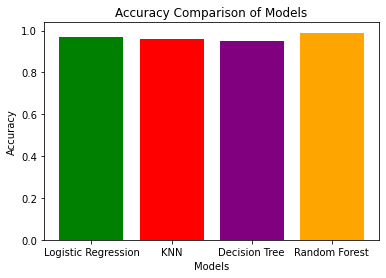

In [182]:
# Define the models and their accuracy scores
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracy_scores = [0.97, 0.96, 0.95, 0.99]

# Specify the colors for each bar
colors = ['green', 'red', 'purple', 'orange']


# Plot the bar graph
x_pos = np.arange(len(models))
plt.bar(x_pos, accuracy_scores, align='center' , color=colors)
plt.xticks(x_pos, models)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Accuracy Comparison of Models')
plt.show()


From the summary graph above, we can deduce that the models  used are accurately  predicting if a patient has chronic kidney disease or not. But the most suitable is the Random Forest classifier

# Clustering

In [195]:
# Droping the label
data.drop('class', axis=1,inplace= True)


In [196]:
data.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,15.4,44.0,7800.0,5.2,1,4,1,0,0,0
1,7,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,11.3,38.0,6000.0,5.2,0,3,1,0,0,0
2,62,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,9.6,31.0,7500.0,5.2,0,4,1,1,0,1
3,48,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,11.2,32.0,6700.0,3.9,1,3,1,1,1,1
4,51,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,11.6,35.0,7300.0,4.6,0,3,1,0,0,0


In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      397 non-null    int32  
 1   blood_pressure           397 non-null    float64
 2   specific gravity         397 non-null    float64
 3   albumin                  397 non-null    float64
 4   sugar                    397 non-null    float64
 5   red blood cells          397 non-null    int32  
 6   pus cell                 397 non-null    int32  
 7   pus cell clumps          397 non-null    int32  
 8   bacteria                 397 non-null    int32  
 9   blood glucose random     397 non-null    float64
 10  blood urea               397 non-null    float64
 11  serum creatinine         397 non-null    float64
 12  sodium                   397 non-null    float64
 13  potassium                397 non-null    float64
 14  hemoglobin               3

In [224]:
#Extracting features for clustering 
X = data[['blood_pressure','diabetes mellitus']]

## Agglomerative clustering

In [252]:
#Find an the number of clusters with the highest accuracy 
Agg_score = []

for i in range(2,15):
    model = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage ='ward')
    pre = model.fit_predict(data)
    Agg_score = silhouette_score(data, pre)
    print(i, 'score is : ', Agg_score)

2 score is :  0.6170631735160808
3 score is :  0.6350574661580581
4 score is :  0.6437346106317889
5 score is :  0.6453334505776919
6 score is :  0.6117096131097463
7 score is :  0.6061750852237529
8 score is :  0.611209029661215
9 score is :  0.6126411371665575
10 score is :  0.6027596678443684
11 score is :  0.6108137875549156
12 score is :  0.567824049895861
13 score is :  0.5426264432035973
14 score is :  0.5423250371628232


The appropriate number of clusters for  agglomerative clustering is 5 because it gives the highest accuracy

In [264]:
from sklearn.cluster import AgglomerativeClustering 

# agg_clusters = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
# agg_clusters.fit(data)

model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 4 clusters 


In [265]:
data['CLUSTER'] = clust_labels

data['CLUSTER'].value_counts()

0    225
1    172
Name: CLUSTER, dtype: int64

In [266]:
#Renaming the clusters
cluster1 = data[data.CLUSTER ==0]
cluster2 = data[data.CLUSTER ==1]


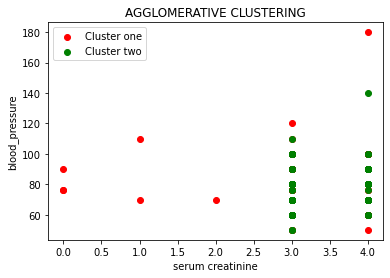

In [270]:
import matplotlib.pyplot as plt
plt.scatter(cluster1['diabetes mellitus'], cluster1['blood_pressure'], c = 'red', label = 'Cluster one')
plt.scatter(cluster2['diabetes mellitus'], cluster2['blood_pressure'], c = 'green', label = 'Cluster two')



plt.title('AGGLOMERATIVE CLUSTERING')
plt.xlabel('serum creatinine')
plt.ylabel('blood_pressure')
plt.legend()

#### plotting the dendogram

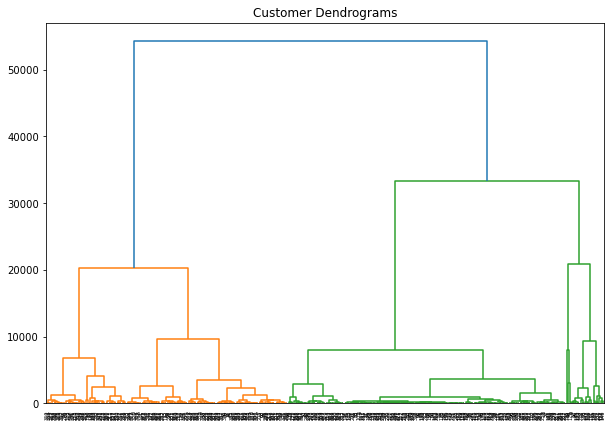

In [285]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="ward"))

### K-Means clustering

In [278]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=2, random_state=0) 

X_train = data.loc[:320]
X_test = data.loc[80:]

model.fit(X_train)

y_pred = model.predict(X_test)


In [279]:
labels = pd.DataFrame(model.labels_)

labels.head()

,0
0,1
1,1
2,1
3,1
4,1


In [280]:
new_data = pd.concat([data.loc[:320],labels], axis=1)


In [281]:
print(f'Silhouette Score(n=2) for training data:{silhouette_score(X_train, model.predict(X_train))}')
print(f'Silhouette Score(n=2) for the test data:{silhouette_score(X_test, y_pred)}')

Silhouette Score(n=2) for training data:0.6148594239938034
Silhouette Score(n=2) for the test data:0.6287517312010295


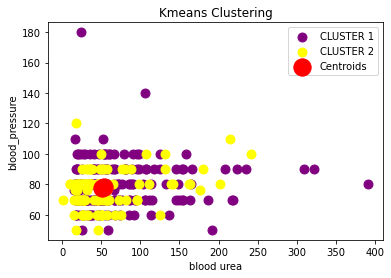

In [283]:
plt.scatter(new_data["blood urea"][new_data[0] == 0],          
            new_data["blood_pressure"][new_data[0] == 0],s=80,c='purple',label='CLUSTER 1')
plt.scatter(new_data["blood urea"][new_data[0] == 1],          
            new_data["blood_pressure"][new_data[0] == 1],s=80,c='yellow',label='CLUSTER 2')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Kmeans Clustering')
plt.xlabel('blood urea')
plt.ylabel('blood_pressure')
plt.legend()
plt.show()

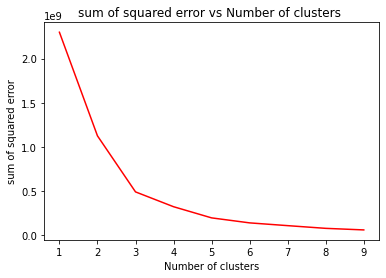

In [284]:

sum_of_squared_dist = []

for i in range(1,10):
  model = KMeans(n_clusters=i)
  model.fit(X_train)
  sum_of_squared_dist.append(model.inertia_)



plt.plot(range(1,10), sum_of_squared_dist, color='r' )
plt.xlabel ('Number of clusters')
plt.ylabel ('sum of squared error')
plt.title('sum of squared error vs Number of clusters ')
plt.show()

The optimal value of k is 3, because  the rate of decrease in SSE slows down when the value of k is 3. This point is referred to as the "elbow point ".